# Story 6

Andrew Bowen
DATA 621
CUNY Data Science Masters

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.express as px

## Data Sources

I found US Food Security data [published by the US Census Bureau here](https://www.census.gov/data/datasets/time-series/demo/cps/cps-supp_cps-repwgt/cps-food-security.html)

- [US Dept of Agriculture Data Sources](https://www.ers.usda.gov/data-products/)
- [USDA Food Location Mapping Data](https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/)
- [USDA GIS Portal](https://gisportal.ers.usda.gov/server/rest/services/FEA/Access_and_Proximity_to_Grocery_Stores/MapServer)

In [40]:
dat = pd.read_csv("https://www2.census.gov/programs-surveys/cps/datasets/2022/supp/dec22pub.csv")

dat.head()

HRHHID  HRMONTH  HRYEAR4  HURESPLI  HUFINAL  FILLER  HETENURE  \
0  351819007700950       12     2022        -1      225     NaN        -1   
1  143200010045972       12     2022        -1      226     NaN        -1   
2  201348501120003       12     2022        -1      225     NaN         1   
3  610009070389621       12     2022        -1      226     NaN        -1   
4     110862907936       12     2022        -1      226     NaN        -1   

   HEHOUSUT  HETELHHD  HETELAVL  ...  HRFS30D1  HRFS30D2  HRFS30D3  HRFS30D4  \
0         1        -1        -1  ...        -1        -1        -1        -1   
1         1        -1        -1  ...        -1        -1        -1        -1   
2         5        -1        -1  ...        -1        -1        -1        -1   
3         1        -1        -1  ...        -1        -1        -1        -1   
4         1        -1        -1  ...        -1        -1        -1        -1   

   HRFS30D5  HRFS30D6  HRFS30D7  HRFS30D8  HRFS30D9  HRFS30DE  
0        -1        -1        -1        -1        -1        -1  
1        -1        -1        -1        -1        -1        -1  
2        -1        -1        -1        -1        -1        -1  
3        -1        -1        -1        -1        -1        -1  
4        -1        -1        -1        -1        -1        -1  

[5 rows x 507 columns]

## Data Wrangling

We'll need to do a significant amount of column renaming. Using [this data dictionary](https://www.ers.usda.gov/webdocs/DataFiles/50764/techdoc2022.pdf?v=1957.8)


*Children’s Food Security Scale variables are coded as “Not in Universe” (-1) if there were no children in the household.*

In [41]:
# Rename dataframe columns
column_renames = {
    "HRHHID": "household_id",
    #"HRHHID2": "household_id2",
    "PESEX": "sex",
    "HRFS12M1": "food_security_level",
    "HRFS12M6": "raw_child_food_security_score",
    "HRFS12MC": "child_food_security_level",
    "HRFS12M8": "adult_food_security_level"
    }

df = dat.rename(columns=column_renames)


In [42]:
df = df[list(column_renames.values())]
df.head()

household_id  sex  food_security_level  raw_child_food_security_score  \
0  351819007700950   -1                   -1                             -1   
1  143200010045972   -1                   -1                             -1   
2  201348501120003   -1                   -1                             -1   
3  610009070389621   -1                   -1                             -1   
4     110862907936   -1                   -1                             -1   

   child_food_security_level  adult_food_security_level  
0                         -1                         -1  
1                         -1                         -1  
2                         -1                         -1  
3                         -1                         -1  
4                         -1                         -1

In [43]:
df.child_food_security_level.unique()

array([-1,  1,  2,  3, -9])

In [44]:
child_level_map =  {3: "Food Secure", 2: "Low Food Security", 1: "Very Low Food Security", -9: "Not in Universe", -1: "No Response"}

adult_level_map = {4: "High", 3: "Marginal", 2: "Low", 1: "Very Low", -9: "Not in Universe", -1: "No Response"}

# Map values
df['child_food_security_level'] = df.child_food_security_level.map(child_level_map)
df['adult_food_security_level'] = df.adult_food_security_level.map(adult_level_map)

## Data Visualization

In [45]:
child_food_security = df.loc[(df.child_food_security_level!="No Response") &
                             (df.child_food_security_level!="Not in Universe")].groupby('child_food_security_level')['child_food_security_level'].count()
child_food_security

child_food_security_level
Food Secure                 335
Low Food Security          2503
Very Low Food Security    30527
Name: child_food_security_level, dtype: int64

Text(0.5, 0.98, 'Childhood Food Security - USDA 2022')

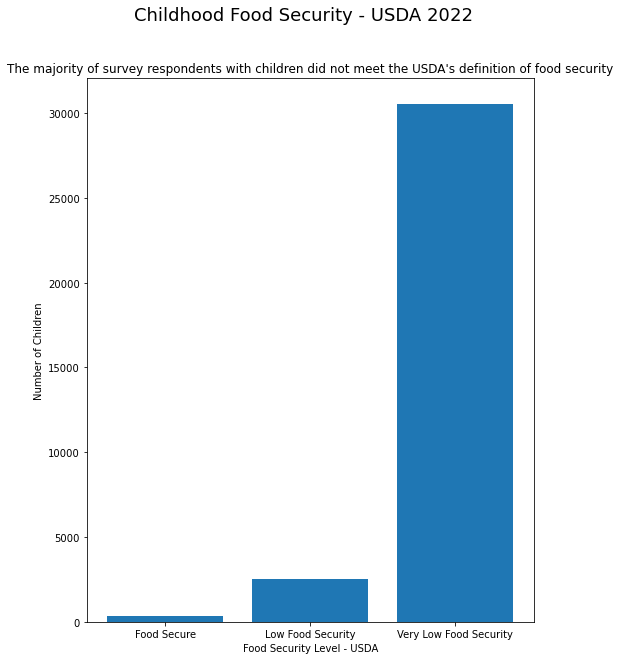

In [46]:
# Plot child food security levels
f, ax = plt.subplots(figsize=(8,10))

ax.bar(child_food_security.index, child_food_security.values)
ax.set_xlabel("Food Security Level - USDA")
ax.set_ylabel("Number of Children")

ax.set_title("The majority of survey respondents with children did not meet the USDA's definition of food security")
f.suptitle("Childhood Food Security - USDA 2022", fontsize=18)

In [47]:
adult_food_security = df.loc[(df.adult_food_security_level!="No Response") &
                             (df.adult_food_security_level!="Not in Universe")].groupby('adult_food_security_level')['adult_food_security_level'].count()
adult_food_security

adult_food_security_level
High         3474
Low          6845
Marginal     5217
Very Low    59280
Name: adult_food_security_level, dtype: int64

Text(0.5, 0.98, 'Adult Food Security - USDA 2022')

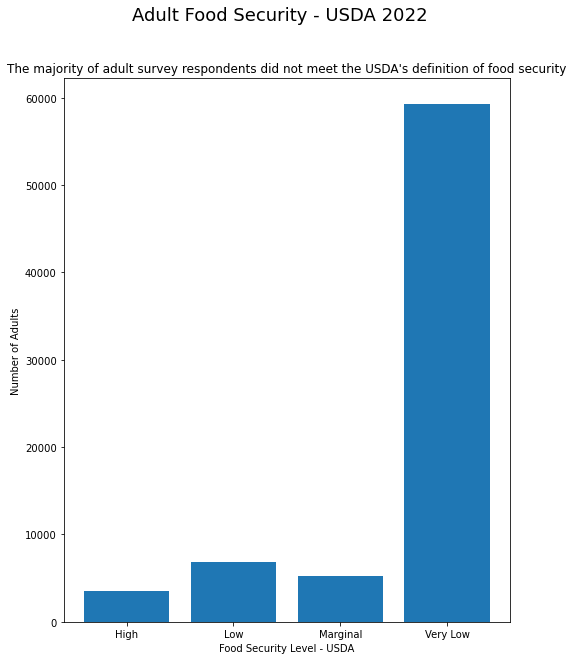

In [48]:
# Plot adult food security levels
f, ax = plt.subplots(figsize=(8,10))

ax.bar(adult_food_security.index, adult_food_security.values)
ax.set_xlabel("Food Security Level - USDA")
ax.set_ylabel("Number of Adults")

ax.set_title("The majority of adult survey respondents did not meet the USDA's definition of food security")
f.suptitle("Adult Food Security - USDA 2022", fontsize=18)

The excel file included is posted on [the US Department of Agriculture website here](https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/). I've converted the file to parquet for easier read-in times.

In [61]:
# Initial read in, converting to parquet format for easier storage
# Uncomment the block below and move the excel file linked into your local data folder

# food_locs = pd.read_excel("data/FoodAccessResearchAtlasData2019.xlsx", sheet_name="Food Access Research Atlas")
# food_locs.to_parquet("./data/food_access", partition_cols=["State"], index=False)
# food_locs.head()

In [60]:
food_locs = pd.read_parquet("data/food_access")

food_locs.head()

CensusTract          County  Urban  Pop2010  OHU2010  GroupQuartersFlag  \
0   1001020100  Autauga County      1     1912      693                  0   
1   1001020200  Autauga County      1     2170      743                  0   
2   1001020300  Autauga County      1     3373     1256                  0   
3   1001020400  Autauga County      1     4386     1722                  0   
4   1001020500  Autauga County      1    10766     4082                  0   

   NUMGQTRS  PCTGQTRS  LILATracts_1And10  LILATracts_halfAnd10  ...  \
0       0.0  0.000000                  0                     0  ...   
1     181.0  8.341014                  1                     1  ...   
2       0.0  0.000000                  0                     0  ...   
3       0.0  0.000000                  0                     0  ...   
4     181.0  1.681219                  0                     0  ...   

   TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  TractOMultir  \
0      1622.0       217.0        14.0         0.0       14.0          45.0   
1       888.0      1217.0         5.0         0.0        5.0          55.0   
2      2576.0       647.0        17.0         5.0       11.0         117.0   
3      4086.0       193.0        18.0         4.0       11.0          74.0   
4      8666.0      1437.0       296.0         9.0       48.0         310.0   

   TractHispanic  TractHUNV  TractSNAP    State  
0           44.0        6.0      102.0  Alabama  
1           75.0       89.0      156.0  Alabama  
2           87.0       99.0      172.0  Alabama  
3           85.0       21.0       98.0  Alabama  
4          355.0      230.0      339.0  Alabama  

[5 rows x 147 columns]

In [81]:
food_locs['county'] = food_locs['County'].str.replace(" County", "")

In [84]:
low_access_kids = pd.DataFrame(food_locs.groupby("county")['lakids1share'].mean()).reset_index()
low_access_kids

county  lakids1share
0                     Abbeville     17.873565
1                 Acadia Parish     14.495645
2                      Accomack     17.704693
3                           Ada     11.541937
4                         Adair     17.404529
...                         ...           ...
1872  Yukon-Koyukuk Census Area     24.836066
1873                       Yuma     12.818134
1874                     Zapata     12.037086
1875                     Zavala     20.668208
1876                    Ziebach     22.349901

[1877 rows x 2 columns]

County GeoJSON can be found [here](https://gist.github.com/sdwfrost/d1c73f91dd9d175998ed166eb216994a)

In [74]:
with open("data/counties.geojson", "r") as f:
    counties=json.load(f)

In [93]:
fig = px.choropleth(low_access_kids, geojson=counties, locations='county', color='lakids1share',
                    scope="usa", featureidkey='properties.NAME', 
                    color_continuous_scale="viridis",)

fig.update_traces(marker_line_width=0)
fig.show()

In [89]:
food_locs.groupby("County")['County'].count()

County
Abbeville County              6
Acadia Parish                12
Accomack County               9
Ada County                   59
Adair County                 22
                             ..
Yukon-Koyukuk Census Area     4
Yuma County                  55
Zapata County                 3
Zavala County                 4
Ziebach County                1
Name: County, Length: 1877, dtype: int64

In [94]:
counties


{'type': 'FeatureCollection',
 'name': 'cb_2017_us_county_20m',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'STATEFP': '06',
    'COUNTYFP': '075',
    'COUNTYNS': '00277302',
    'AFFGEOID': '0500000US06075',
    'GEOID': '06075',
    'NAME': 'San Francisco',
    'LSAD': '06',
    'ALAND': 121485107,
    'AWATER': 479107241},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.511983, 37.771129999086256],
      [-122.465396, 37.800878999086],
      [-122.398139, 37.80562999908597],
      [-122.385323, 37.79072399908609],
      [-122.376462, 37.73855799908652],
      [-122.356784, 37.72950499908658],
      [-122.361749, 37.71500999908672],
      [-122.389826876588, 37.70833099908677],
      [-122.50067801908301, 37.70813256710466],
      [-122.50560125134501, 37.73556746432725],
      [-122.511983, 37.771129999086256]]]}},
  {'type': 'Feature',
   'properties': {'STATEFP': '25',
    '